In [4]:
import sys
sys.path.insert(1, '../')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error

from agingml import temporal_degradation_test as tdt

In [9]:
def plot_results():
    for model in models:
        errors_df = pd.read_parquet(f'../results/aging/{dataset}/aging_{dataset}_{model}_{n_simulations}_simulations_{n_prod}_prod.parquet')
        d_errors_df = pd.read_parquet(f'../results/aging/{dataset}/aging_{dataset}_{model}_{n_simulations}_simulations_{n_prod}_prod_{freq}.parquet')
        
        errors_df = errors_df[errors_df['model_age'] <= 80]
        d_errors_df = d_errors_df[d_errors_df['model_age'] <= 80]
        test_errors_df = errors_df[errors_df['partition'] == 'test']
        test_mape = test_errors_df.groupby('simulation_id').apply(lambda group: mean_absolute_percentage_error(group.y, group.y_pred))
        test_mape = pd.DataFrame(test_mape, columns=['test_mape']).reset_index()

        d_errors_df = pd.merge(d_errors_df, test_mape, how='left', on='simulation_id')
        d_errors_df = d_errors_df[d_errors_df['test_mape'] <= 0.1]

        valid_models = len(d_errors_df['simulation_id'].drop_duplicates())
        print(f'There are {valid_models} out of {n_simulations}')

        d_errors_df['degradation'] = d_errors_df['error'] > 0.15

        print(d_errors_df['degradation'].value_counts(normalize=True))
        degradations_per_model = d_errors_df.groupby(['simulation_id'])[['degradation']].sum().reset_index()
        num_degradated_models = len(degradations_per_model[degradations_per_model['degradation'] > 5])

        print(f"{num_degradated_models} out of {len(degradations_per_model)} models ({np.round(100 * num_degradated_models / len(degradations_per_model), 1)} %) degradaded")

        print(degradations_per_model.degradation.sort_values())
        fig = tdt.plot_aging_chart(d_errors_df, metric='MAPE', freq='weeks', plot_name=f"Model Aging Chart: NYC Taxi Trip Demand - {model}")
        fig.show()
        fig.savefig(f'../figures/aging/{dataset}/aging_plot_{dataset}_{model}_{n_simulations}_simulations_{n_prod}_prod.svg', format='svg')

There are 724 out of 1500
False    0.911984
True     0.088016
Name: degradation, dtype: float64
721 out of 724 models (99.6 %) degradaded
662      3
297      5
322      5
399      7
649      7
      ... 
408    256
545    256
503    257
568    267
116    270
Name: degradation, Length: 724, dtype: int64


/var/folders/yn/9gj_99ys1mz0_tkl2kvh5wd40000gn/T/ipykernel_20137/1808163482.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


There are 90 out of 1500
False    0.780025
True     0.219975
Name: degradation, dtype: float64
90 out of 90 models (100.0 %) degradaded
59     97
24    102
6     113
1     114
48    114
     ... 
73    200
20    209
61    214
19    215
75    219
Name: degradation, Length: 90, dtype: int64


/var/folders/yn/9gj_99ys1mz0_tkl2kvh5wd40000gn/T/ipykernel_20137/1808163482.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


There are 1007 out of 1500
False    0.949225
True     0.050775
Name: degradation, dtype: float64
1007 out of 1007 models (100.0 %) degradaded
256    13
396    13
453    14
287    14
856    14
       ..
900    89
388    95
985    95
21     96
385    99
Name: degradation, Length: 1007, dtype: int64


/var/folders/yn/9gj_99ys1mz0_tkl2kvh5wd40000gn/T/ipykernel_20137/1808163482.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


There are 0 out of 1500
Series([], Name: degradation, dtype: float64)


ZeroDivisionError: division by zero

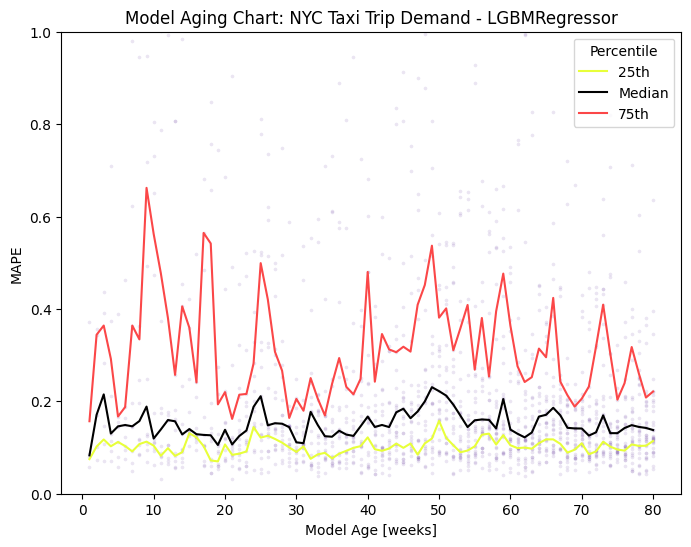

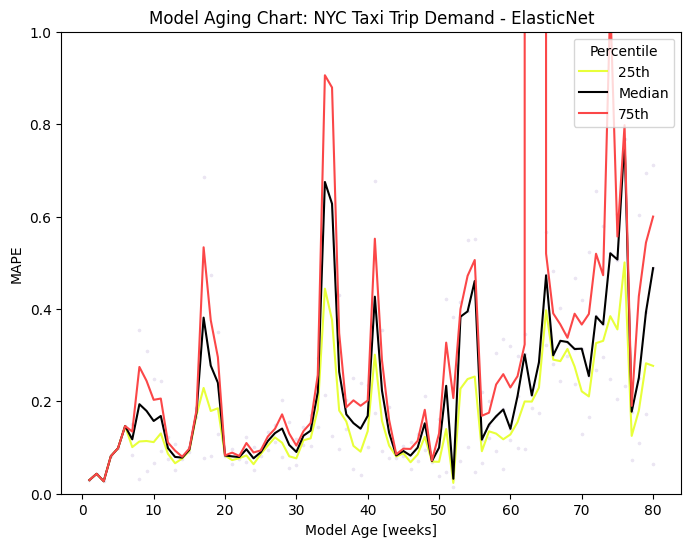

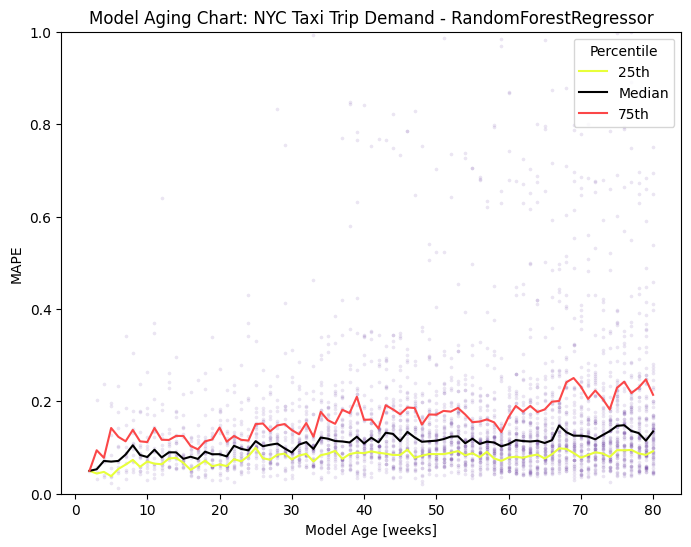

In [10]:
dataset = 'taxi'
n_train = 8800 # one year
n_test = 2200
n_prod = 4400
n_simulations = 1500
metric = mean_absolute_percentage_error
freq = 'D'
models =['LGBMRegressor', 'ElasticNet', 'RandomForestRegressor', 'MLPRegressor']
plot_results()